Getting a gene matrix from https://bmcecolevol.biomedcentral.com/articles/10.1186/s12862-016-0822-x

I will prune the matrix to get only the genus we are interested plus Aphodius (outgroup)

The matrix looks like an alignment, so I am going to skip that step.


Maybe now I can insert in the nexus the coi for:

1. three ataenius
2. Canthon cyanellus   
3. Canthidium centrale  
4. Onthophagus batesi 

In [1]:
list_of_genera = ["Eurysternus_","Ataenius_","Ataenius_","Digitonthophagus_","Ateuchus_","Copris_","Canthon_","Euoniticellus_","Canthidium_","Onthophagus_","Aphodius_"]

In [2]:
import re
import random

species = []
n_tax = 0
matrix_section = False

with open("./Multigenes/tmp.nex", "w") as ofile:

    with open("./Multigenes/plus_extras_12862_2016_822_MOESM3_ESM.nex", "r") as ifile:
        for nline, line in enumerate(ifile):
            
            #only enter if in matrix section
            if matrix_section:
                line = line.replace("?", "-")
                
                #if reach end of the matrix write line and toggle matrix section flag and exit the loop
                if line == ";\n":
                    ofile.write(line)
                    print("reached end of the matrix")
                    matrix_section = False
                    continue #exit loop in this point
                
                #check it the genus in line is in list of genus that we need
                if any([genus in line for genus in list_of_genera]):
                    # print(line[0:10])
                    
                    #just in case some species are duplicated, just put a random number to avoid duplication
                    species_in_line = line.split(" ")[0]
                    if species_in_line in species:
                        line = re.sub(species_in_line, f"{species_in_line}{random.randint(0,9999)}", line)
                        print(species_in_line, " changed due duplication")
                    else:
                        species.append(species_in_line)
                    
                    ofile.write(line)
                    n_tax += 1
            
            else:
                if "MATRIX" in line:
                    print("start of the matrix")
                    matrix_section = True
                
                
                ofile.write(line)

#update the NTAX
with open("./Multigenes/selected2.nex", "w") as ofile:

    with open("./Multigenes/tmp.nex", "r") as ifile:

        for line in ifile:
            if "NTAX" in line:
                line = re.sub("NTAX=\d*", f"NTAX={n_tax}", line)
                print("NTAX changed to ", n_tax)
                ofile.write(line)
            else:
                ofile.write(line)


start of the matrix
Canthidium_centrale  changed due duplication
Canthidium_centrale  changed due duplication
Canthidium_guanacaste  changed due duplication
Canthidium_haroldi  changed due duplication
Canthidium_rufinum  changed due duplication
Euoniticellus_intermedius  changed due duplication
reached end of the matrix
NTAX changed to  105


In [ ]:
!iqtree -s ./Multigenes/selected2.nex \
-bb 1000 \
-nt 4 \
-redo \
-pre ./analysis_iqtree/multigenes_selected2 \
-m TEST \
-T AUTO \ 

In [53]:
#Visualizar árbol
import toytree

tree = toytree.tree("./analysis_iqtree/multigenes_selected2.treefile", tree_format=1)
OUTGROUP = "Aphodius"
tree = tree.root(wildcard=OUTGROUP)
c,_,_ = tree.draw(use_edge_lengths=False, height=1000)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="1000.0px" viewBox="0 0 400.0 1000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9531e3843ccf42ae983d29c5a5e7f399"> Onthophagus_vinctus Onthophagus_depressus Onthophagus_hinnulus Onthophagus_variegatus Onthophagus_flavimargo Onthophagus_taurus Onthophagus_hecate Onthophagus_sp_2 Onthophagus_sp_1 Onthophagus_muticus Onthophagus_alcyon Onthophagus_furcaticeps Onthophagus_haematopus Onthophagus_bidentatus Onthophagus_crinitus Onthophagus_batesi Onthophagus_sp_4 Onthophagus_quadripustulatus Onthophagus_mije Euoniticellus_sp Euoniticellus_intermedius1813 Euoniticellus_intermedius Euoniticellus_triangulatus_2 Euoniticellus_triangulatus_1 Euoniticellus_fulvus Onthophagus_elegans Onthophagus_diabolicus Onthophagus_semiareus Onthophagus_avocetta Onthophagus_seniculus Digitonthophagus_gazella_3_Vog Digitonthophagus_gazella_3_2 Digitonthophagus_gazella_3_1 Digitonthophagus_sp Digitonthophagus_gazella_3 Onthophagus_signatus Onthophagus_sp_3 Canthon_sp_2 Canthon_deyrollei Canthon_indigaceus Canthon_perseverans Canthon_sp_3 Canthon_aequinoctialis Canthon_quinquemaculatus Canthon_viridis Canthon_luteicollis Canthon_sp_4 Canthon_sp_1 Canthon_lamprimus Canthon_cyanellus Canthon_smaragdulus Canthon_fulgidus Copris_sp_3 Copris_sp_2 Copris_minutus Copris_amyntor_2_1 Copris_amyntor_2 Copris_sp_1 Copris_sinicus Copris_confucius Copris_sp1 Copris_lugubris Copris_agnus Ateuchus_sp1 Ateuchus_chrysopygus Ateuchus_floridensis Ateuchus_ecuadorensis Ateuchus_viduus Ateuchus_sp Canthidium_sp1_2 Canthidium_sp1_1 Canthidium_guanacaste Canthidium_guanacaste6458 Canthidium_sp_ Canthidium_thalassinum Canthidium_rufinum6093 Canthidium_rufinum Eurysternus_sp1_2 Eurysternus_sp1_1 Eurysternus_sp_2 Eurysternus_angustulus Eurysternus_plebejus Eurysternus_sp_1 Eurysternus_hamaticollis Eurysternus_caribaeus Eurysternus_velutinus Eurysternus_inflexus Canthidium_centrale3055 Canthidium_centrale Canthidium_haroldi1026 Canthidium_haroldi Canthidium_centrale1519 Ataenius_sp4 Ataenius_opatroides Ataenius_sp5 Ataenius_sp7 Ataenius_sp6 Ataenius_sp2 Ataenius_sp3 Ataenius_sp Aphodius_sp_1 Aphodius_aegrotus Aphodius_sp_3 Aphodius_sp_2 Aphodius_lividus

In [54]:
import toyplot.pdf
toyplot.pdf.render(c, "./Figures/multigenes_selected2.pdf")

--used genbank sequences  
--no all species for that we looked in genbank  
--add other samples found in genbank  
--mix of secuences of (species and also add the GBs) with the big dataset, filtering only those genura present in our sampling
--alignments of new secuences were done manually in phyde.  
--species did not find in the dataset or genbank we selected a close relative in the same genus as a representative   
--a tree with multiple individuals was reconstructed to avoid long branch attraction due to the high missing data for some species due to the lack of specific genes  
--finally the tree was prunned, maintaining branch length for further phylogenetic diversity (PD).




To reconstruct a phylogenetic tree we mixed XXXXgene sequences of three ataenius (gb###), Canthon cyanellus (gb###), Canthidium centrale (gb###), and Onthophagus batesi (gb###) with more than 500 samples in 11 genera from Tarasov and Dimitrov (2016) dataset. Alignments were done in Muscle v.xxxx (cite) with manual refining in Phyde v.xxx (cite). A inicial total tree was reconstructed in IQtree v.xxx (cite) using multiple individuals per genera in order to avoid long branch attraction in some particular clades due to some missing genes in our final alignment. We ran 1000 ultrafast boostrap (cite) replicates to assess support values. For species in our sampling without sequences in the dataset or genbank, we selected a close relative species, in the same genus, as a representative for the final phylogeny. Then we prunned the final tree to retain the samples of interest and turn it into an ultrametric tree using toytree v.### (eaton 2020) for further phylogenetic diversity analyses.

## Prune big tree

In [55]:
list_of_selected_samples = {"Aphodius_lividus": "Aphodius_lividus_outgroup",
                            "Eurysternus_sp_2": "Eurysternus_mexicanus",
                            "Eurysternus_sp1_1": "Eurysternus_maya",
                            "Ataenius_opatroides": "Ataenius_aff_crenulatus",
                            "Ataenius_sp": "Ataenius_aff_sculptor",
                            "Ataenius_sp7": "Ataenius_sp2",
                            "Ataenius_sp2": "Ataenius_sp3",
                            "Ataenius_sp5": "Ataenius_sp4",
                            "Digitonthophagus_gazella_3_Vog": "Digitonthophagus_gazella*",
                            "Ateuchus_ecuadorensis": "Ateuchus_illaesum",
                            "Copris_sinicus": "Copris_laeviceps",
                            "Canthon_cyanellus": "Canthon_cyanellus*",
                            "Canthon_sp_1": "Canthon_euryscelis",
                            "Euoniticellus_intermedius": "Euoniticellus_intermedius",
                            "Canthidium_centrale": "Canthidium_centrale*",
                            "Canthidium_haroldi": "Canthidium_pseudoperceptibile",
                            "Onthophagus_batesi": "Onthophagus_batesi*",
                           }

In [56]:
prunned_tree = tree.prune(names=list_of_selected_samples.keys())

In [57]:
prunned_tree = prunned_tree.ladderize()

prunned_tree = prunned_tree.set_node_values("name", list_of_selected_samples)

c,_,_ =prunned_tree.draw()

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="395.0px" height="306.0px" viewBox="0 0 395.0 306.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t92389c489c434d02a29f200de4741c86"> Onthophagus_batesi* Euoniticellus_intermedius Digitonthophagus_gazella* Canthon_euryscelis Canthon_cyanellus* Copris_laeviceps Ateuchus_illaesum Eurysternus_maya Eurysternus_mexicanus Canthidium_centrale* Canthidium_pseudoperceptibile Ataenius_aff_crenulatus Ataenius_sp4 Ataenius_sp2 Ataenius_sp3 Ataenius_aff_sculptor Aphodius_lividus_outgroup

In [58]:
import toyplot.pdf
toyplot.pdf.render(c, "./Figures/multigenes_prunned_with_distances.pdf")

In [59]:
c,_,_ = prunned_tree.draw(use_edge_lengths=False)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="395.0px" height="306.0px" viewBox="0 0 395.0 306.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta32c4736c7484ceeaab1f28377f8dac4"> Onthophagus_batesi* Euoniticellus_intermedius Digitonthophagus_gazella* Canthon_euryscelis Canthon_cyanellus* Copris_laeviceps Ateuchus_illaesum Eurysternus_maya Eurysternus_mexicanus Canthidium_centrale* Canthidium_pseudoperceptibile Ataenius_aff_crenulatus Ataenius_sp4 Ataenius_sp2 Ataenius_sp3 Ataenius_aff_sculptor Aphodius_lividus_outgroup

In [60]:
import toyplot.pdf
toyplot.pdf.render(c, "./Figures/multigenes_prunned.pdf")

Comparison with: https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2664.14185

Comparar árbol con el siguiente:  
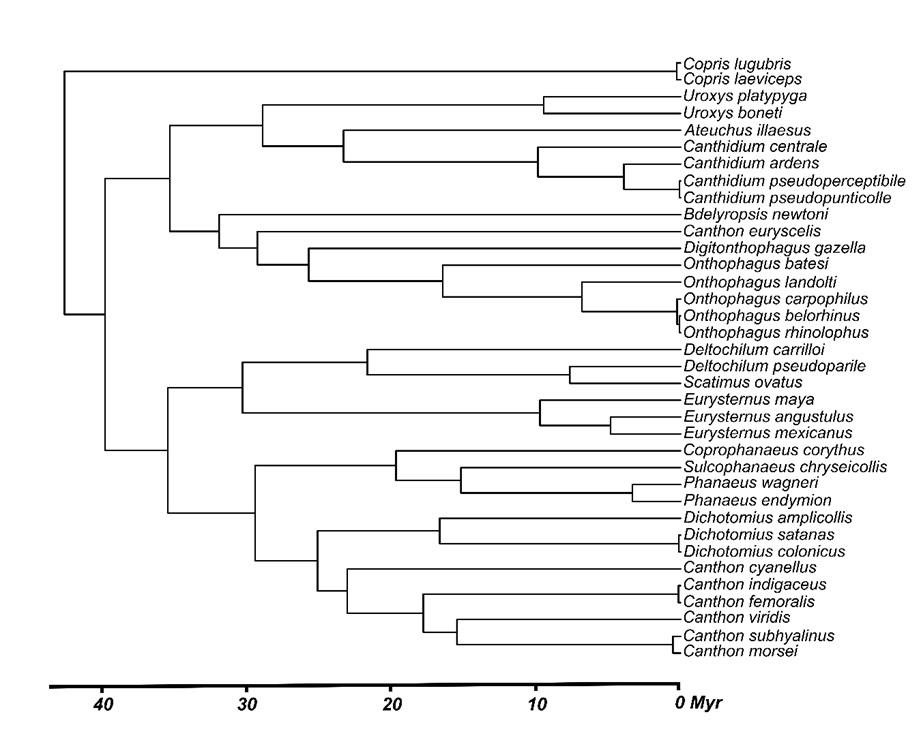

Fuente: https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2664.14185

## ~~Reducing matrix to only samples we need~~

this is not working well

In [2]:
import re
import random

species = []
n_tax = 0
matrix_section = False

with open("./Multigenes/tmp.nex", "w") as ofile:

    with open("./Multigenes/plus_extras_12862_2016_822_MOESM3_ESM.nex", "r") as ifile:
        for nline, line in enumerate(ifile):
            
            
            #only enter if in matrix section
            if matrix_section:
                line = line.replace("?", "-")
            
            
                #if reach end of the matrix write line and toggle matrix section flag and exit the loop
                if line == ";\n":
                    ofile.write(line)
                    print("reached end of the matrix")
                    matrix_section = False
                    continue #exit loop in this point
                
                #check it the genus in line is in list of genus that we need
                if any([genus in line for genus in list_of_selected_samples]):
                    # print(line[0:10])
                    
                    #avoid multiple matches
                    species_in_line = line.split(" ")[0]
                    if species_in_line not in species:
                        species.append(species_in_line)
                        print(species_in_line)
                        ofile.write(line)
                        n_tax += 1
            
            else:
                if "MATRIX" in line:
                    print("start of the matrix")
                    matrix_section = True
                
                
                ofile.write(line)

#update the NTAX
with open("./Multigenes/selected_only_needed.nex", "w") as ofile:

    with open("./Multigenes/tmp.nex", "r") as ifile:

        for line in ifile:
            if "NTAX" in line:
                line = re.sub("NTAX=\d*", f"NTAX={n_tax}", line)
                print("NTAX changed to ", n_tax)
                ofile.write(line)
            else:
                ofile.write(line)


start of the matrix
Ataenius_sp
Ataenius_opatroides
Ataenius_sp2
Ataenius_sp5
Ataenius_sp7
Aphodius_lividus
Ateuchus_ecuadorensis
Canthidium_centrale
Canthidium_haroldi
Canthon_cyanellus
Canthon_sp_1
Copris_sinicus
Digitonthophagus_gazella_3_Vog
Euoniticellus_intermedius
Eurysternus_sp_2
Eurysternus_sp1_1
Onthophagus_batesi
reached end of the matrix
NTAX changed to  17


In [ ]:
!iqtree -s ./Multigenes/selected_only_needed.nex \
-bb 1000 \
-nt 4 \
-redo \
-pre ./analysis_iqtree/multigenes_selected_only_needed \
-m TEST \
-T AUTO \ 

In [1]:
#Visualizar árbol
import toytree

tree = toytree.tree("./analysis_iqtree/multigenes_selected_only_needed.treefile", tree_format=1)
OUTGROUP = "Aphodius"
tree = tree.root(wildcard=OUTGROUP)
tree.draw(use_edge_lengths=False, height=500)

(<toyplot.canvas.Canvas at 0x2ba016c1a560>,
 <toytree.Render.ToytreeMark at 0x2ba15c376d40>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="500.0px" viewBox="0 0 400.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc394c058ac05471a8e0204a289fa95cd"> Ataenius_sp5 Ataenius_opatroides Ataenius_sp2 Ataenius_sp Ataenius_sp7 Euoniticellus_intermedius Onthophagus_batesi Digitonthophagus_gazella_3_Vog Copris_sinicus Eurysternus_sp1_1 Eurysternus_sp_2 Ateuchus_ecuadorensis Canthidium_haroldi Canthidium_centrale Canthon_cyanellus Canthon_sp_1 Aphodius_lividus

## Final test, running all 500 samples plus added in the big dataset
Testing if the position of the genera in this mega tree is congruent with my genera selected tree.

In [36]:
import re
import random

species = []
n_tax = 0
matrix_section = False

with open("./Multigenes/tmp.nex", "w") as ofile:

    with open("./Multigenes/plus_extras_12862_2016_822_MOESM3_ESM.nex", "r") as ifile:
        for nline, line in enumerate(ifile):
            
            #only enter if in matrix section
            if matrix_section:
                line = line.replace("?", "-")
                
                #if reach end of the matrix write line and toggle matrix section flag and exit the loop
                if line == ";\n":
                    ofile.write(line)
                    print("reached end of the matrix")
                    matrix_section = False
                    continue #exit loop in this point
                

                #just in case some species are duplicated, just put a random number to avoid duplication
                species_in_line = line.split(" ")[0]
                if species_in_line in species:
                    line = re.sub(species_in_line, f"{species_in_line}{random.randint(0,9999)}", line)
                    print(species_in_line, " changed due duplication")
                else:
                    species.append(species_in_line)

                ofile.write(line)
                n_tax += 1

            else:
                if "MATRIX" in line:
                    print("start of the matrix")
                    matrix_section = True
                
                
                ofile.write(line)

#update the NTAX
with open("./Multigenes/megamatrix.nex", "w") as ofile:

    with open("./Multigenes/tmp.nex", "r") as ifile:

        for line in ifile:
            if "NTAX" in line:
                line = re.sub("NTAX=\d*", f"NTAX={n_tax}", line)
                print("NTAX changed to ", n_tax)
                ofile.write(line)
            else:
                ofile.write(line)


start of the matrix
Canthidium_centrale  changed due duplication
Canthidium_centrale  changed due duplication
Canthidium_guanacaste  changed due duplication
Canthidium_haroldi  changed due duplication
Canthidium_rufinum  changed due duplication
Deltochilum_mexicanum  changed due duplication
Dicranocara_deschodti  changed due duplication
Euoniticellus_intermedius  changed due duplication
Lepanus_ustulatus  changed due duplication
Pycnopanelus_krikkeni  changed due duplication
Sarophorus_costatus_1  changed due duplication
Sarophorus_costatus_2  changed due duplication
Scybalophagus_plicatipennis  changed due duplication
Xinidium_dentilabris_1  changed due duplication
Xinidium_dentilabris_2  changed due duplication
reached end of the matrix
NTAX changed to  562


In [ ]:
!iqtree -s ./Multigenes/megamatrix.nex \
-bb 1000 \
-nt 4 \
-redo \
-pre ./analysis_iqtree/megamatrix \
-m TEST \
-T AUTO \ 

In [1]:
#Visualizar árbol
import toytree

tree = toytree.tree("./analysis_iqtree/megamatrix.treefile", tree_format=1)
# OUTGROUP = "Aphodius"
# tree = tree.root(wildcard=OUTGROUP)
c,_,_ = tree.draw(use_edge_lengths=False, height=5000)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="5000.0px" viewBox="0 0 400.0 5000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tcd7d8961964e4db8a5f4476a6540ce0d"> Helictopleurus_perrieri Helictopleurus_fulgens Helictopleurus_splendidicollis Helictopleurus_quadripunctatus Helictopleurus_unifasciatus Helictopleurus_politicollis Helictopleurus_fissicollis Helictopleurus_sinuaticornis Helictopleurus_giganteus Helictopleurus_coruscus Helictopleurus_nicollei Helictopleurus_marsyas Helictopleurus_carbonarius Helictopleurus_rudicollis Heterosyphus_sicardi Helictopleurus_fungicola Helictopleurus_semivirens Helictopleurus_dorbignyi Helictopleurus_steineri Helictopleurus_viridiflavus Liatongus_vertagus_2 Liatongus_vertagus_1 Tiniocellus_sarawacus Euoniticellus_sp Euoniticellus_intermedius862 Euoniticellus_intermedius Euoniticellus_fulvus Liatongus_californicus Oniticellus_planatus_2 Oniticellus_planatus_1 Oniticellus_sp_2 Oniticellus_sp_1 Oniticellus_sp_3 Oniticellus_egregius Eodrepanus_bechynei Tragiscus_dimidiatus_2 Tragiscus_dimidiatus_1 Euoniticellus_triangulatus_2 Euoniticellus_triangulatus_1 Drepanocerus_orientalis Drepanocerus_kirbyi Tiniocellus_spinipes_1 Tiniocellus_sp_3 Tiniocellus_spinipes_2 Tiniocellus_sp_2 Tiniocellus_sp_1 Liatongus_militaris_2 Liatongus_militaris_1 Liatongus_sp_3 Liatongus_sp_2 Liatongus_sp_1 Cyptochirus_sp Cyptochirus_ambiguus Proagoderus_sapphirinus Onthophagus_semiareus Onthophagus_elegans Onthophagus_avocetta Onthophagus_diabolicus Onthophagus_seniculus Proagoderus_sp_2 Proagoderus_sp_1 Proagoderus_schwaneri Proagoderus_bicallosus Hylonthophagus_sp_2 Hylonthophagus_sp_1 Onthophagus_alcyon Onthophagus_hinnulus Onthophagus_depressus Onthophagus_muticus Onthophagus_taurus Milichus_sp_1 Milichus_sp_2 Milichus_apicalis Caccobius_sp_2 Caccobius_sp_1 Cleptocaccobius_convexifrons Caccobius_nigritulus Onthophagus_hecate Onthophagus_flavimargo Caccobius_schreberi Onthophagus_variegatus Caccobius_binodulus Onthophagus_furcaticeps Onthophagus_sp_2 Onthophagus_sp_1 Onthophagus_vinctus Euonthophagus_carbonarius Onthophagus_haematopus Onthophagus_bidentatus Onthophagus_crinitus Onthophagus_batesi Onthophagus_sp_4 Onthophagus_quadripustulatus Onthophagus_mije Digitonthophagus_gazella_3_Vog Digitonthophagus_gazella_3_2 Digitonthophagus_gazella_3_1 Digitonthophagus_sp Digitonthophagus_gazella_3 Onthophagus_sp_3 Onthophagus_signatus Phalops_ardea Phalops_sp_3 Phalops_sp_1 Phalops_sp_2 Onitis_sp1_2 Onitis_sp1_1 Onitis_alexis_1_Vog Onitis_alexis_1 Onitis_sp Onitis_falcatus Anonychonitis_sp_3 Anonychonitis_sp_1 Anonychonitis_sp_2 Heteronitis_sp_3 Heteronitis_sp_2 Heteronitis_sp_1 Heteronitis_castelnaui Bubas_bubalus Bubas_bison Onitis_caffer Onitis_fulgidus Cheironitis_sp_2 Cheironitis_sp_1 Cheironitis_hoplosternus Xinidium_dentilabris_29660 Xinidium_dentilabris_1 Xinidium_dewitzi_2 Xinidium_dewitzi_1 Xinidium_dewitzi_3 Xinidium_dentilabris_3 Xinidium_dentilabris_2 Xinidium_dentilabris_14177 Hammondantus_psammophilus_2 Hammondantus_psammophilus_1 Hammondantus_psammophilus Pycnopanelus_krikkeni8180 Pycnopanelus_krikkeni Dwesasilvasedis_medinae_3 Dwesasilvasedis_medinae_1 Dwesasilvasedis_medinae_2 Macroderes_sp_4 Macroderes_sp_2 Macroderes_sp1 Macroderes_sp_1 Macroderes_mutilatus_3 Macroderes_mutilatus_2 Macroderes_mutilatus_1 Macroderes_sp_3 Macroderes_amplior Macroderes_minutus Aphengoecus_multiserratus_3 Aphengoecus_multiserratus_1 Aphengoecus_multiserratus_2 Allogymnopleurus_sp_3 Allogymnopleurus_sp_2 Allogymnopleurus_sp_1 Garreta_nitens Garreta_sp_2 Garreta_sp_1 Garreta_sp_3 Paragymnopleurus_sp Paragymnopleurus_maurus Paragymnopleurus_striatus

In [19]:
list_of_selected_samples = {"Aphodius_lividus": "Aphodius_lividus_outgroup",
                            "Eurysternus_sp_2": "Eurysternus_mexicanus",
                            "Eurysternus_sp1_1": "Eurysternus_maya",
                            "Ataenius_opatroides": "Ataenius_aff_crenulatus",
                            "Ataenius_sp": "Ataenius_aff_sculptor",
                            "Ataenius_sp7": "Ataenius_sp2",
                            "Ataenius_sp2": "Ataenius_sp3",
                            "Ataenius_sp5": "Ataenius_sp4",
                            "Digitonthophagus_gazella_3_Vog": "Digitonthophagus_gazella*",
                            "Ateuchus_ecuadorensis": "Ateuchus_illaesum",
                            "Copris_sinicus": "Copris_laeviceps",
                            "Canthon_cyanellus": "Canthon_cyanellus*",
                            "Canthon_sp_1": "Canthon_euryscelis",
                            "Euoniticellus_intermedius": "Euoniticellus_intermedius",
                            "Canthidium_centrale": "Canthidium_centrale*",
                            "Canthidium_haroldi": "Canthidium_pseudoperceptibile",
                            "Onthophagus_batesi": "Onthophagus_batesi*",
                           }

In [20]:
prunned_tree = tree.prune(names=list_of_selected_samples.keys())

In [21]:
prunned_tree = prunned_tree.ladderize()

prunned_tree = prunned_tree.set_node_values("name", list_of_selected_samples)

prunned_tree = prunned_tree.root(wildcard="Aphodius")

c,_,_ =prunned_tree.draw()

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="395.0px" height="306.0px" viewBox="0 0 395.0 306.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t766a3ff4673d44b489930caf11bb1cdd"> Canthidium_centrale* Canthidium_pseudoperceptibile Canthon_euryscelis Canthon_cyanellus* Ateuchus_illaesum Euoniticellus_intermedius Onthophagus_batesi* Digitonthophagus_gazella* Copris_laeviceps Eurysternus_maya Eurysternus_mexicanus Ataenius_aff_crenulatus Ataenius_sp4 Ataenius_aff_sculptor Ataenius_sp3 Ataenius_sp2 Aphodius_lividus_outgroup

In [5]:
import toyplot.pdf
toyplot.pdf.render(c, "./Figures/megamatrix_prunned_with_distances.pdf")

In [28]:
c,_,_ = prunned_tree.draw(use_edge_lengths=False, node_labels=prunned_tree.get_node_values("support"))

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="395.0px" height="306.0px" viewBox="0 0 395.0 306.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9f54680b3dba4ba7b095d0db6dc8cfa3"> 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Canthidium_centrale* Canthidium_pseudoperceptibile Canthon_euryscelis Canthon_cyanellus* Ateuchus_illaesum Euoniticellus_intermedius Onthophagus_batesi* Digitonthophagus_gazella* Copris_laeviceps Eurysternus_maya Eurysternus_mexicanus Ataenius_aff_crenulatus Ataenius_sp4 Ataenius_aff_sculptor Ataenius_sp3 Ataenius_sp2 Aphodius_lividus_outgroup

In [7]:
import toyplot.pdf
toyplot.pdf.render(c, "./Figures/megamatrix_prunned.pdf")

In [5]:
prunned_tree.write("megamatrix_prunned.tre")

In [16]:
ultra = prunned_tree.mod.make_ultrametric()

In [18]:
ultra.write("megamatrix_prunned_ultrametric.tre")